# Prediccion De Accidentes Cerebrovasculares

## Librerias utilizadas en el proyecto

Si no teneis instalada la libreria imblearn,ejecuta la celda siguiente

In [ ]:
pip install imblearn

In [1]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import SMOTEN

# División del dataset
from sklearn.model_selection import train_test_split


# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación del modelo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Otros
import warnings 
# Desactiva las advertencias (warnings) que puedan generarse durante la ejecución del código.
warnings.filterwarnings('ignore')

In [2]:
# Cargamos el dataset
healthcareData = pd.read_csv('healthcare-dataset-stroke-data.csv')
# Visualización inicial del conjunto de datos
healthcareData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Analizamos los datos

In [3]:
# Visualizamos la informacion básica del conjunto de datos
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna 
# Tipo de dato de cada columna
# Tamaño total del dataset
healthcareData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
healthcareData.shape

(5110, 12)

In [5]:
# Número de datos nulos por variable
print(healthcareData.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Eliminamos los datos que no son importantes y que podrian afectar el resultado.
df_healthcare = healthcareData.drop(['id'], axis=1)

In [7]:
# Visualizamos la información estadística del conjunto de datos para las variables numericas
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Visualizamos la información estadística del conjunto de datos para las variables cualitativas o categóricas 
df_healthcare.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


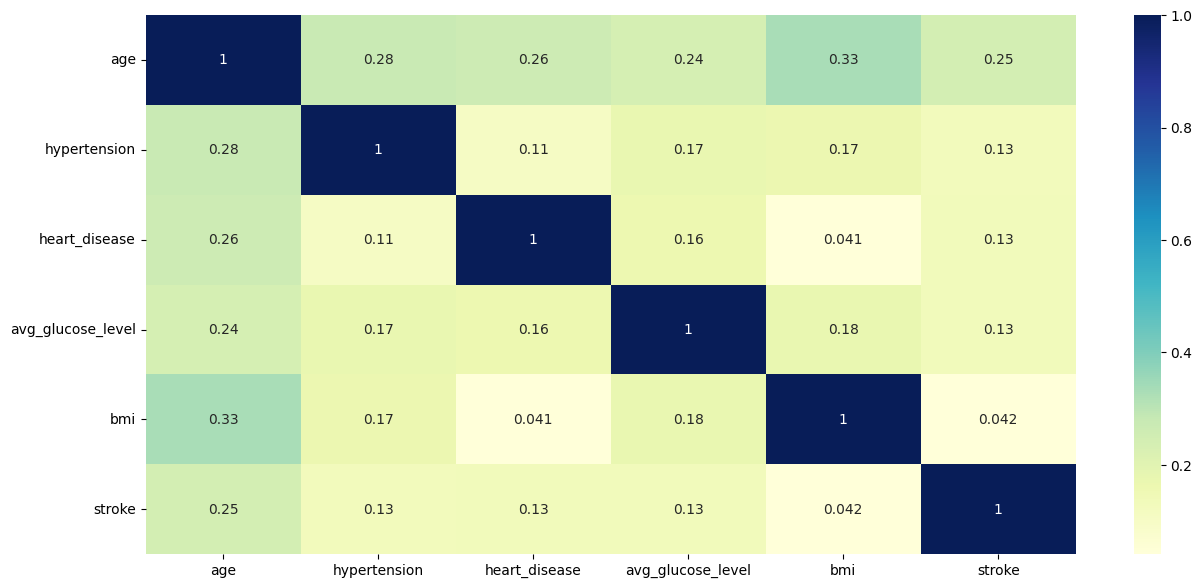

In [9]:
# Validamos las correlaciones de las variables
correlation = df_healthcare.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df_healthcare.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

In [10]:
# Comprobamos las variables que poseen mas correlación con respecto a la variable de salida
df_healthcare.corr()['stroke'].sort_values()

bmi                  0.042374
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
stroke               1.000000
Name: stroke, dtype: float64

# Analizamos las variables númericas

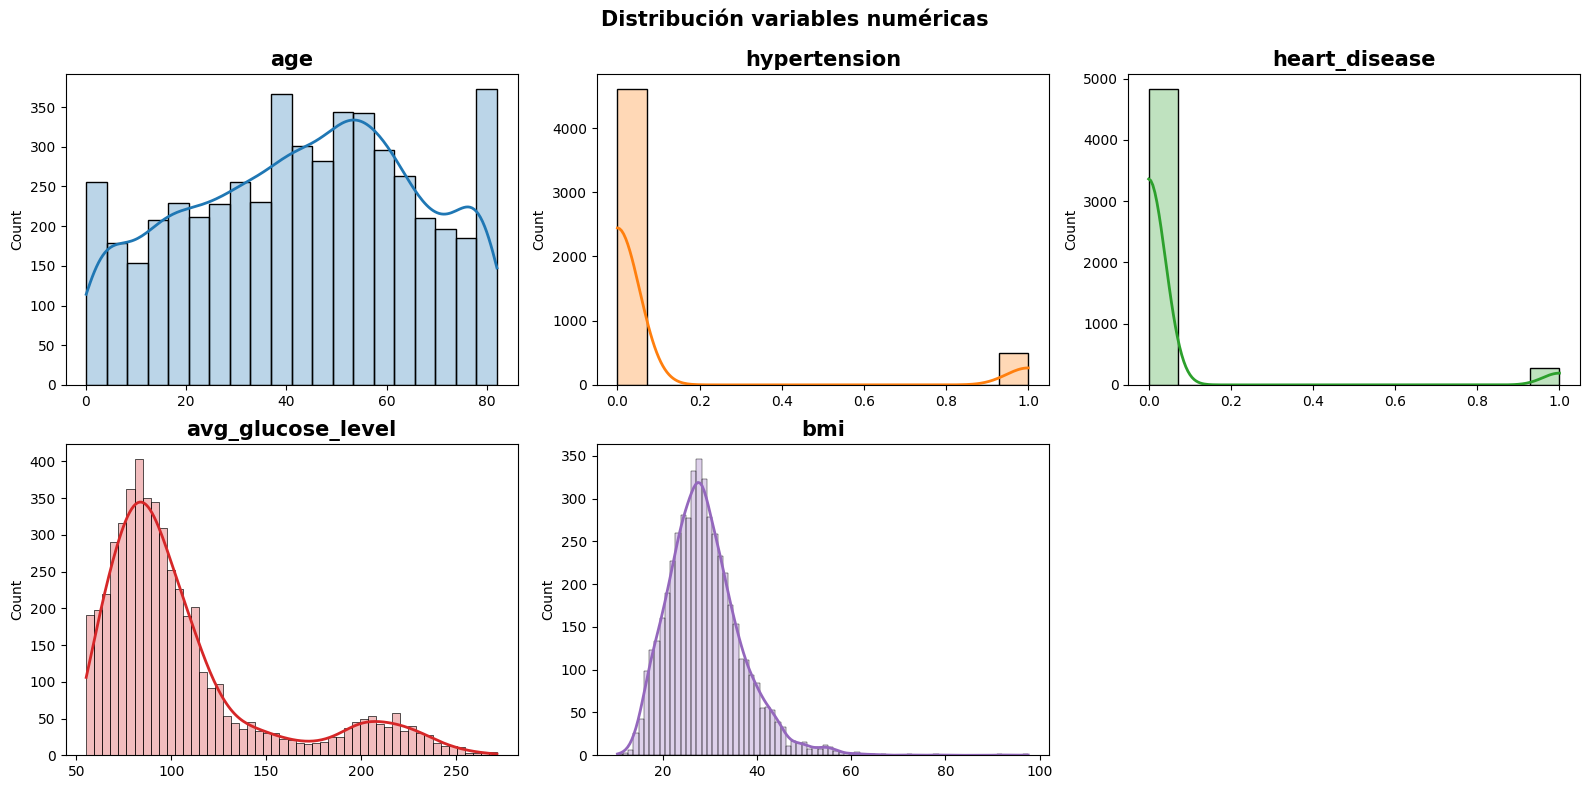

In [11]:
# Gráficamos la distribución para cada variable numérica
# Ajustamos el número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numericas = df_healthcare.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numericas = columnas_numericas.drop('stroke')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numericas):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df_healthcare,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

In [12]:
# Creamos una función que calcula los valores del límite inferior y superior en las variables numericas
# Para poder identificar y analizar los posibles outliers que las varibles puedan contener
def calcula_limites(data,ft):
    # Cálculamos los valores de los cuartiles
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    # Cálculamos el rango intercuartílico 
    IQR = Q3 - Q1
    # Cálculamos los valores de los bigotes inferior y superior
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    # Impimimos los valores cálculados
    print(f"El límite inferior es {lower_bound} y el límite superior {upper_bound}")
    # Retornamos los valores del límite inferior y superior
    return lower_bound, upper_bound

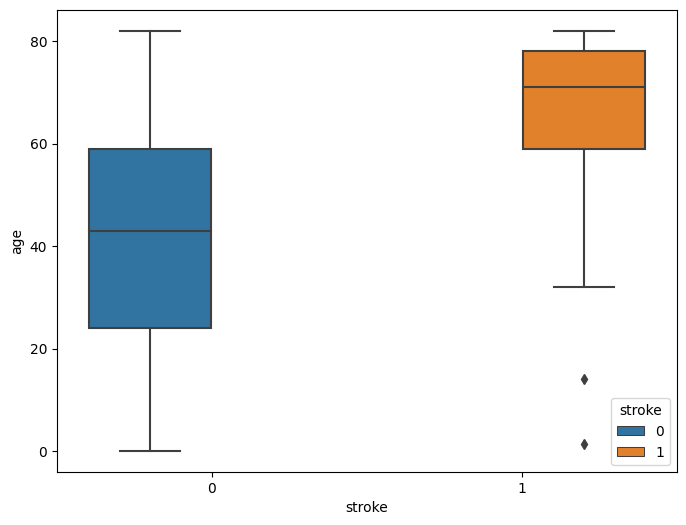

In [13]:
# Gráficamos la variable "age"
figura, ejes = plt.subplots( figsize= (8,6))
sns.boxplot(data=df_healthcare,
            x="stroke",
            y="age",
            hue="stroke",
            )
plt.show()

In [14]:
# Usamos la funcion para validar los valores del limite inferior y superior en la variable "age"
# que refleja algunos outliers, que se pueden vizualizar en la grafica anteriror
lower_bound, upper_bound = calcula_limites(df_healthcare,'age')

El límite inferior es -29.0 y el límite superior 115.0


In [15]:
# Extraemos las filas, que contengan valores en la columna "age" que sobrepasen los valores de los límites cálculados
# con la funcion anterior
df_healthcare_filtrado_ql_Age = df_healthcare[(df_healthcare['age'] > upper_bound) | (df_healthcare['age'] < lower_bound)]
# Vizualizamos los datos localizados 
df_healthcare_filtrado_ql_Age

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
# Extraemos las filas que contengan edades menores a 18 años 
df_healthcare_filtrado_edad = df_healthcare[(df_healthcare['age'] < 18)]
# Vizualizamos los datos localizados 
df_healthcare_filtrado_edad

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [17]:
# Visulaizamos la información estadística de los datos localizados para las variables numéricas
df_healthcare_filtrado_edad.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,856.000000,856.000000,856.000000,856.000000,836.000000,856.000000
mean,8.560748,0.001168,0.001168,94.385981,21.392703,0.002336
std,5.386510,0.034179,0.034179,27.129487,6.278310,0.048309
min,0.080000,0.000000,0.000000,55.340000,10.300000,0.000000
25%,3.000000,0.000000,0.000000,76.120000,17.600000,0.000000
50%,8.000000,0.000000,0.000000,89.075000,19.900000,0.000000
75%,13.000000,0.000000,0.000000,109.040000,23.500000,0.000000
max,17.000000,1.000000,1.000000,233.710000,97.600000,1.000000


In [18]:
# Visualizamos la información estadística de los datos localizados para las variables cualitativas o categóricas 
df_healthcare_filtrado_edad.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,856,856,856,856,856
unique,2,1,5,2,4
top,Male,No,children,Rural,Unknown
freq,438,856,687,429,682


In [19]:
# Recuento de cada categoría de datos para la variable "work_type"
df_healthcare_filtrado_edad.work_type.value_counts().sort_index()

Govt_job           6
Never_worked      17
Private          134
Self-employed     12
children         687
Name: work_type, dtype: int64

In [20]:
# Recuento de casos de Accidente de Cerebro Vasculares en los datos
df_healthcare_filtrado_edad[df_healthcare_filtrado_edad['stroke']==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [21]:
# Reagrupamos la varibale smoking_status
dic_replace = {'Govt_job': "children",
               'Never_worked': "children",
               'Private': "children",
               'Self-employed': "children"}

In [22]:
#Reemplazamos los valores de la columna "work_type" mediante una funcion lambda utilizando un diccionario de reemplazo "dic_replace".
# Si un valor no está en el diccionario, se deja sin cambios.
df_healthcare_filtrado_edad['work_type'] = df_healthcare_filtrado_edad['work_type'].apply(lambda x: dic_replace[x] if x in dic_replace else x)

In [23]:
# Eliminamos las filas con valores menores a 18 años en la columna "age"
# Seleccionamos los datos a eliminar
df_healthcare_elimnados=df_healthcare[df_healthcare['age']< 18].index
# Eliminamos los datos seleccionados
df_healthcare_limpios=df_healthcare.drop(df_healthcare_elimnados)
# Reseteamos el index de la filas
df_healthcare_limpios.reset_index(drop=True, inplace=True)
# Vizualizamos los cambios aplicados
df_healthcare_limpios  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4249,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
4250,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4251,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4252,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
# Concatenamos el dataset sin la carateristica tranformada y el dataset de la caracteristica tranformada
df_healthcare_unidos = pd.concat([df_healthcare_limpios, df_healthcare_filtrado_edad],ignore_index=True)
# Visualizamos los cambios aplicados
df_healthcare_unidos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5106,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5107,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5108,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


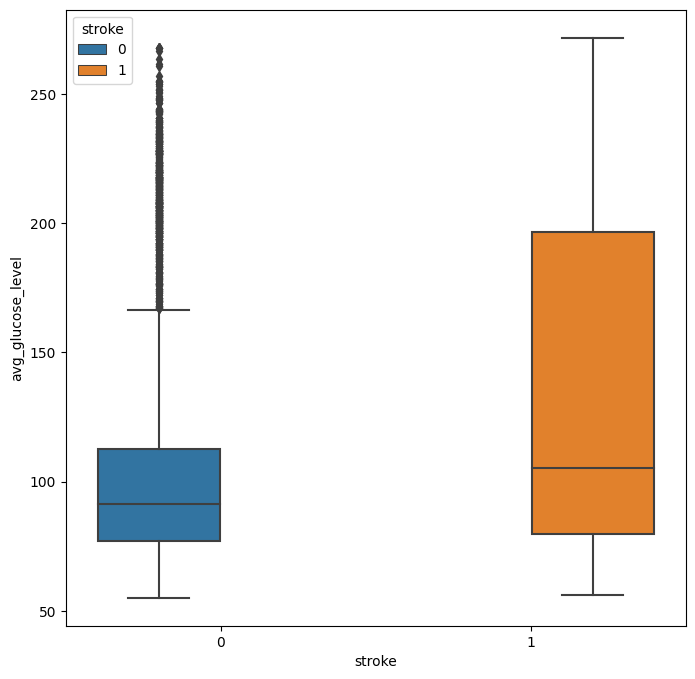

In [25]:
# Gráficamos la variable "avg_glucose_level"
figura, ejes = plt.subplots(figsize= (8,8))
sns.boxplot(data=df_healthcare_unidos,
            x="stroke",
            y="avg_glucose_level",
            hue="stroke",
            )
plt.show()

Vemos que la variable stroke cuando toma como valor 0 contiene muchos valores atipicos

In [26]:
# Ejecutamos la función creada anteriormente para validar los valores del limite inferior y superior en la variable "avg_glucose_level"
# que refleja algunos outliers, que se pueden vizualizar en la grafica de caja anteriror
lower_bound, upper_bound = calcula_limites(df_healthcare_unidos,'avg_glucose_level')

El límite inferior es 21.977500000000006 y el límite superior 169.35750000000002


In [27]:
# Extraemos las filas, que contengan valores en la columna "avg_glucose_level" que sobrepasen los valores de los límites cálculados
df_healthcare_filtrado_ql_avgGlucoseLevel = df_healthcare_unidos[(df_healthcare_unidos['avg_glucose_level'] > upper_bound ) | (df_healthcare_unidos['avg_glucose_level'] < lower_bound)]
# Vizualizamos los datos localizados
df_healthcare_filtrado_ql_avgGlucoseLevel

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4704,Male,1.64,0,0,No,children,Urban,170.88,20.8,Unknown,0
4800,Female,15.00,0,0,No,children,Urban,190.89,22.0,never smoked,0
4846,Female,13.00,0,0,No,children,Rural,219.81,NaN,Unknown,0
4889,Female,13.00,0,0,No,children,Rural,172.27,16.6,never smoked,0


In [28]:
# Recuento de casos de Accidentes Cerebros Vasculares en los datos
df_healthcare_filtrado_ql_avgGlucoseLevel.stroke.value_counts().sort_index()

0    543
1     84
Name: stroke, dtype: int64

In [29]:
# Visualizamos la información estadística del conjunto de datos para las variables numéricas
df_healthcare_filtrado_ql_avgGlucoseLevel.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,627.000000,627.000000,627.000000,627.000000,566.000000,627.000000
mean,59.959553,0.258373,0.164274,211.341595,33.353180,0.133971
std,16.257800,0.438090,0.370820,20.825706,7.930821,0.340893
min,1.000000,0.000000,0.000000,169.430000,14.200000,0.000000
25%,52.000000,0.000000,0.000000,196.760000,27.700000,0.000000
50%,62.000000,0.000000,0.000000,210.000000,32.100000,0.000000
75%,72.500000,1.000000,0.000000,226.715000,37.575000,0.000000
max,82.000000,1.000000,1.000000,271.740000,71.900000,1.000000


In [30]:
# Visualizamos la información estadística del conjunto de datos
# Variables cualitativas o categóricas 
df_healthcare_filtrado_ql_avgGlucoseLevel.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,627,627,627,627,627
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,329,552,368,322,259


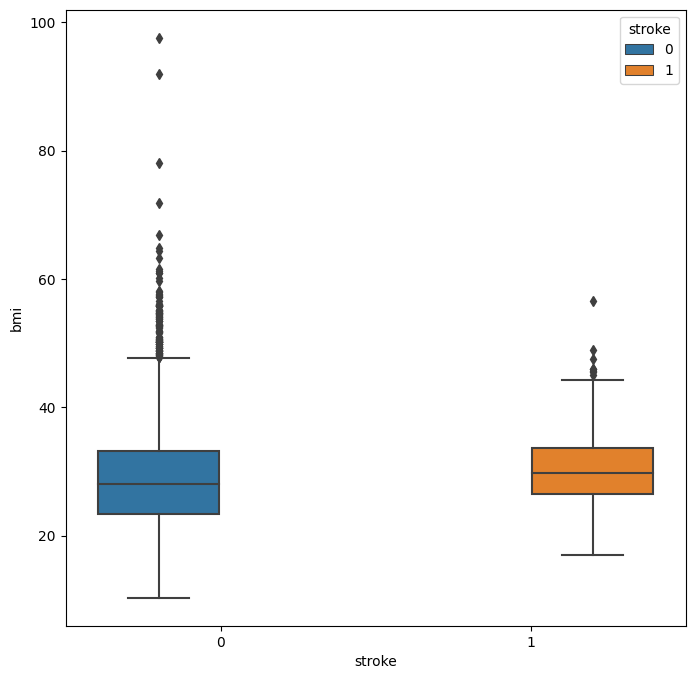

In [31]:
# Gráfica de caja para la variable "bmi"
figura, ejes = plt.subplots(figsize= (8,8))


sns.boxplot(data=df_healthcare_unidos,
            x="stroke",
            y="bmi",
            hue="stroke",
            )


plt.show()

In [32]:
# Ejecutamos la función creada anteriormente para validar los valores del limite inferior y superior en la variable "avg_glucose_level"
# que refleja algunos outliers, que se pueden vizualizar en la grafica de caja anteriror
lower_bound, upper_bound = calcula_limites(df_healthcare_unidos,'bmi')

El límite inferior es 9.099999999999998 y el límite superior 47.5


In [33]:
# Extraemos las filas, que contengan valores en la columna "avg_glucose_level" que sobrepasen los valores de los límites cálculados
df_healthcare_filtrado_ql_bmi = df_healthcare_unidos[(df_healthcare_unidos['bmi'] >  upper_bound ) | (df_healthcare_unidos['bmi'] < lower_bound)]
# Vizualizamos los datos localizados
df_healthcare_filtrado_ql_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
249,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
253,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
265,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4167,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
4210,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0
4317,Female,17.0,0,0,No,children,Urban,67.81,55.7,never smoked,0
4562,Male,17.0,1,0,No,children,Rural,61.67,97.6,Unknown,0


In [34]:
# Recuento de casos de ACV en los datos
df_healthcare_filtrado_ql_bmi.stroke.value_counts().sort_index()

0    108
1      2
Name: stroke, dtype: int64

In [35]:
# Visualizamos la información estadística del conjunto de datos para las variables numéricas
df_healthcare_filtrado_ql_bmi.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,44.463636,0.190909,0.009091,119.972364,54.181818,0.018182
std,13.210836,0.394816,0.095346,57.169152,7.565302,0.134220
min,14.000000,0.000000,0.000000,56.630000,47.600000,0.000000
25%,35.500000,0.000000,0.000000,79.225000,49.800000,0.000000
50%,46.000000,0.000000,0.000000,96.050000,52.750000,0.000000
75%,53.000000,0.000000,0.000000,169.575000,55.700000,0.000000
max,74.000000,1.000000,1.000000,239.190000,97.600000,1.000000


In [36]:
# Visualizamos la información estadística del conjunto de datos para las variables cualitativas o categóricas 
df_healthcare_filtrado_ql_bmi.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,110,110,110,110,110
unique,2,2,4,2,4
top,Female,Yes,Private,Rural,never smoked
freq,85,85,74,61,48


In [37]:
# Separamos la varible "bmi" del resto de datos
df_healthcare_bmi = df_healthcare_unidos[['bmi']]
# Visualizamos los datos separados
df_healthcare_bmi

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,16.8
5106,24.3
5107,17.4
5108,17.5


In [38]:
# Definimos la estrategia a utilizar
imputer = SimpleImputer(strategy='median')
# Pasamos el dataset con los valores seleccionados
imputer.fit(df_healthcare_bmi)
# Rellenamos los valores nulos
pred_bmi = imputer.transform(df_healthcare_bmi)

In [39]:
# Transformamos el resultado a un DataFrame de Pandas
df_healthcare2 = pd.DataFrame(pred_bmi, columns=df_healthcare_bmi.columns)
# Visualizamos los cambios aplicados
df_healthcare2

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,16.8
5106,24.3
5107,17.4
5108,17.5


In [40]:
# Pasamos las características transformadas al dataset original:
# Eliminamos la columna del dataset original 
df_healthcare_elimnados2 = df_healthcare_unidos.drop(['bmi'], axis=1)
# Visualizamos los cambios aplicados
df_healthcare_elimnados2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,0.72,0,0,No,children,Rural,62.13,Unknown,0
5106,Male,13.00,0,0,No,children,Urban,82.38,Unknown,0
5107,Male,1.08,0,0,No,children,Rural,79.15,Unknown,0
5108,Male,9.00,0,0,No,children,Urban,71.88,Unknown,0


In [41]:
# Concatenamos el dataset sin la caraterística transformada y el dataset de la característica transformada
df_healthcare_unidos2 = pd.concat([df_healthcare_elimnados2,df_healthcare2], axis=1,sort=True)
# Visualizamos los cambios aplicados
df_healthcare_unidos2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,0.72,0,0,No,children,Rural,62.13,Unknown,0,16.8
5106,Male,13.00,0,0,No,children,Urban,82.38,Unknown,0,24.3
5107,Male,1.08,0,0,No,children,Rural,79.15,Unknown,0,17.4
5108,Male,9.00,0,0,No,children,Urban,71.88,Unknown,0,17.5


# Analizamos las variables categóricas

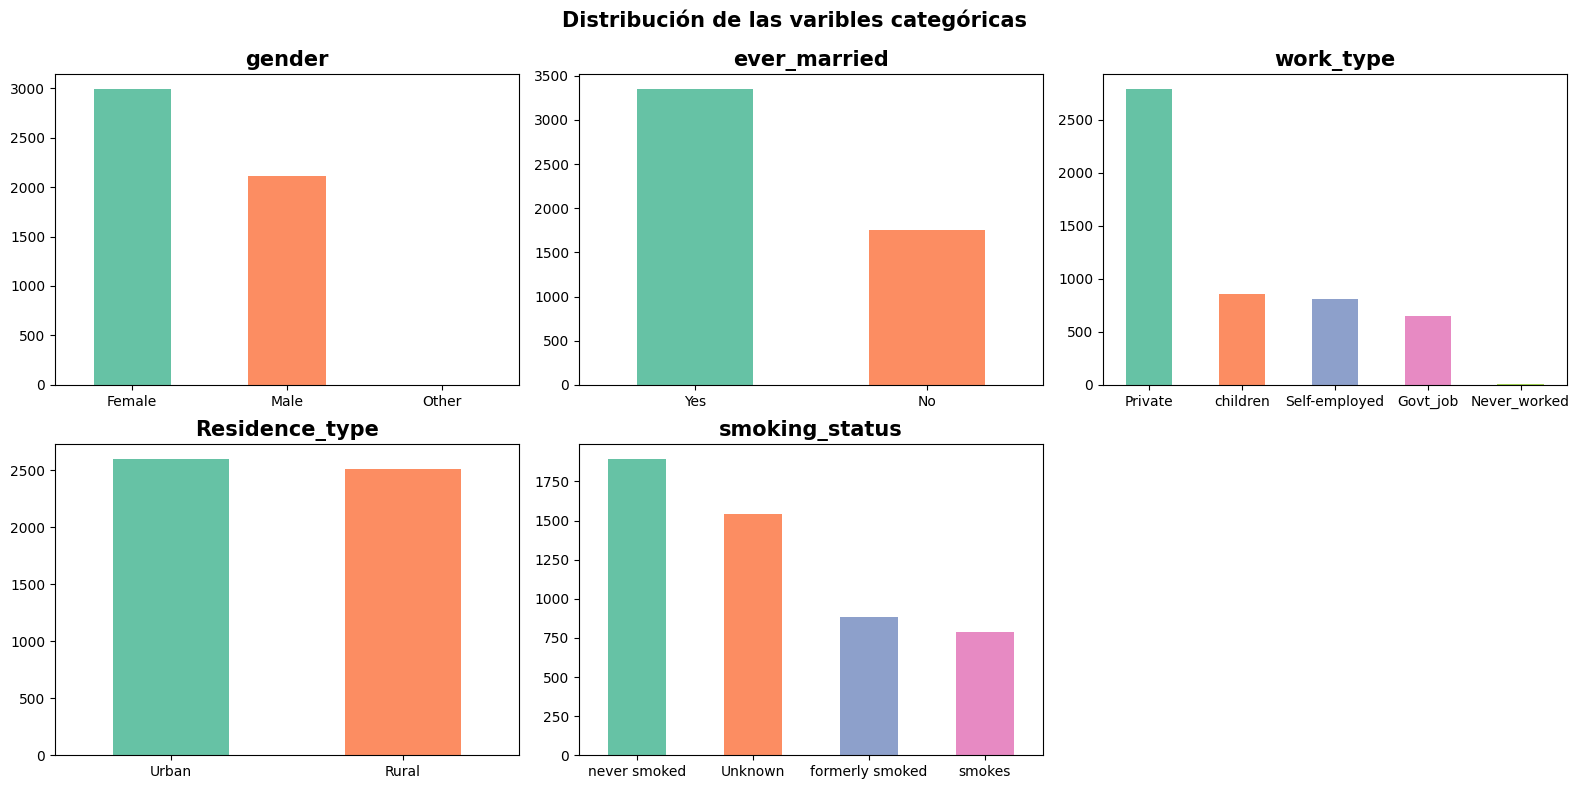

In [42]:
# Gráficas de distribución para cada variable categórica: nominales y ordinales
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_object = df_healthcare_unidos2.select_dtypes(include=['object']).columns
# Recorremos cada columna seleccionada
for i, colum in enumerate(columnas_object):
    # Gráficamos cada columna 
    df_healthcare_unidos2[colum].value_counts().plot.bar(ax = axes[i], color=sns.color_palette("Set2"),rot=0)
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [5]:
   fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de las varibles categóricas',
             fontsize = 15, fontweight = "bold");

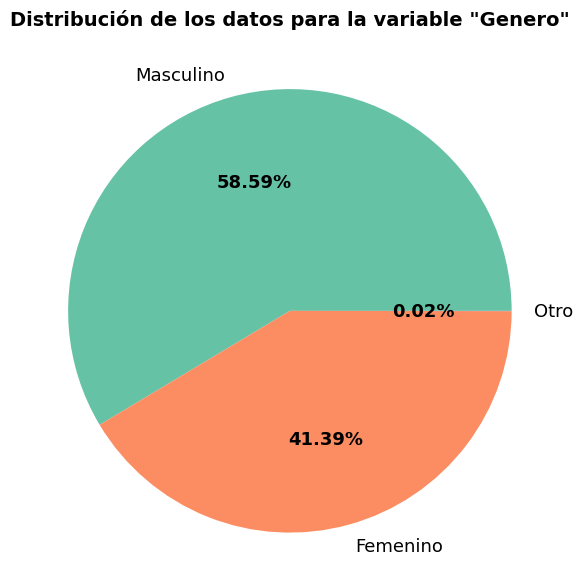

In [43]:
# Gráfica de pastel de la variable "gender", para validar el porcentaje de cada categoría que posee dicha columna.
# Seleccionamos la variable a gráficar
gender = df_healthcare_unidos2['gender'].value_counts()
names = 'Masculino', 'Femenino', 'Otro'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=gender, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Genero"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [44]:
# Separamos las filas que contengan "Other" en la columna "gender" para poder analizarlas.
numero_other = df_healthcare_unidos2[(df_healthcare_unidos2['gender']=='Other')]
# Visualizamos el tamaño del dataset generado con los valores seleccionados
numero_other.shape

(1, 11)

In [45]:
# Recuento de valores para la variable de salida
numero_other.groupby("stroke").size()

stroke
0    1
dtype: int64

Eliminamos las filas con valores "Other" en la columna "gender", ya que la cantidad de datos es baja,
los cuales desbalancean la distribución de los valores de la variable.

In [46]:
# Seleccionamos los datos a eliminar 
df_healthcare_elimnados3=df_healthcare_unidos2[df_healthcare_unidos2["gender"]=='Other'].index
# Eliminados los datos seleccionados 
df_healthcare_elimnados4=df_healthcare_unidos2.drop(df_healthcare_elimnados3)
# Reseteamos el index de la filas
df_healthcare_elimnados4.reset_index(drop=True, inplace=True)
# Visualizamos los cambios aplicados 
df_healthcare_elimnados4

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,0.72,0,0,No,children,Rural,62.13,Unknown,0,16.8
5105,Male,13.00,0,0,No,children,Urban,82.38,Unknown,0,24.3
5106,Male,1.08,0,0,No,children,Rural,79.15,Unknown,0,17.4
5107,Male,9.00,0,0,No,children,Urban,71.88,Unknown,0,17.5


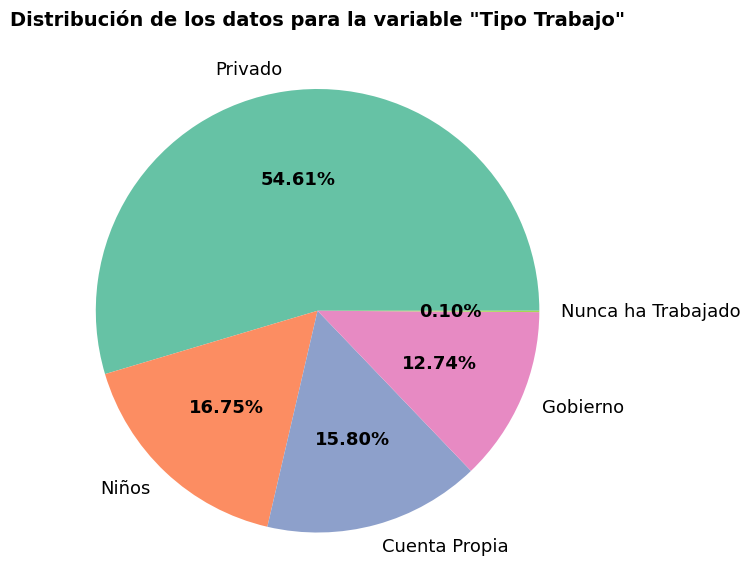

In [47]:
# Gráfica de pastel de la variable "work_type", para validar el porcentaje de cada categoría que posee dicha columna.
# Seleccionamos la variable a gráficar
work_type = df_healthcare_elimnados4['work_type'].value_counts()
names = 'Privado', 'Niños', 'Cuenta Propia','Gobierno', 'Nunca ha Trabajado'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=work_type, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Tipo Trabajo"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [48]:
# Separamos las filas que contengan "Never_worked" en la columna "work_type" para poder analizarlas.
numero_neverWorked = df_healthcare_elimnados4[(df_healthcare_elimnados4["work_type"]=='Never_worked')]
# Visualizamos el tamaño del dataset generado con los valores seleccionados
numero_neverWorked.shape

(5, 11)

In [49]:
# Recuento de valores para la variable de salida
numero_neverWorked.groupby("stroke").size()

stroke
0    5
dtype: int64

In [50]:
# Seleccionamos los datos a eliminar 
df_healthcare_elimnados5=df_healthcare_elimnados4[df_healthcare_elimnados4["work_type"]=='Never_worked'].index
# Eliminados los datos seleccionados 
df_healthcare_elimnados6=df_healthcare_elimnados4.drop(df_healthcare_elimnados5)
# Reseteamos el index de la filas
df_healthcare_elimnados6.reset_index(drop=True, inplace=True)
# Visualizamos los cambios aplicados 
df_healthcare_elimnados6

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5099,Female,0.72,0,0,No,children,Rural,62.13,Unknown,0,16.8
5100,Male,13.00,0,0,No,children,Urban,82.38,Unknown,0,24.3
5101,Male,1.08,0,0,No,children,Rural,79.15,Unknown,0,17.4
5102,Male,9.00,0,0,No,children,Urban,71.88,Unknown,0,17.5


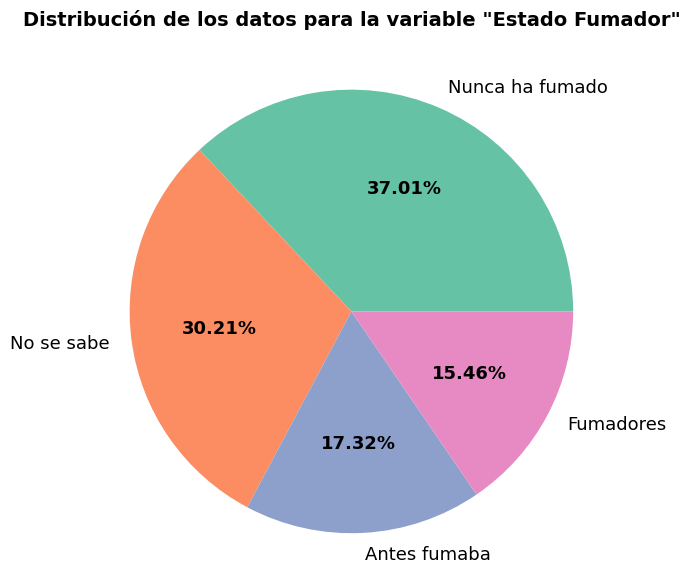

In [51]:
# Gráfica de pastel de la variable "smoking_status", para validar el porcentaje de cada categoría que posee dicha columna.
# Seleccionamos la variable a gráficar
smoking_status = df_healthcare_elimnados6['smoking_status'].value_counts()
names = 'Nunca ha fumado', 'No se sabe', 'Antes fumaba', 'Fumadores'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=smoking_status, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Estado Fumador"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [52]:
# Separamos las filas que contengan "Unknown" en la columna "smoking_status" para poder analizarlas.
numero_unknown = df_healthcare_elimnados6[(df_healthcare_elimnados6["smoking_status"]=='Unknown')]
# Visualizamos el tamaño del dataset generado con los valores seleccionados
numero_unknown.shape

(1542, 11)

In [53]:
# Recuento de valores para la variable de salida
numero_unknown.groupby("stroke").size()

stroke
0    1495
1      47
dtype: int64

In [54]:
# Reemplazamos los valores "Unknown" en la columna "smoking_status" con valores vacios. 
df_healthcare_elimnados6.loc[df_healthcare_elimnados6['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
# Visualizamos los cambios aplicados 
df_healthcare_elimnados6

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5099,Female,0.72,0,0,No,children,Rural,62.13,NaN,0,16.8
5100,Male,13.00,0,0,No,children,Urban,82.38,NaN,0,24.3
5101,Male,1.08,0,0,No,children,Rural,79.15,NaN,0,17.4
5102,Male,9.00,0,0,No,children,Urban,71.88,NaN,0,17.5


In [55]:
# Separamos la varible "smoking_status" del resto de datos
df_healthcare_smookingStatus = df_healthcare_elimnados6[['smoking_status']]
# Visualizamos los datos separados
df_healthcare_smookingStatus 

,smoking_status
0,formerly smoked
1,never smoked
2,never smoked
3,smokes
4,never smoked
...,...
5099,NaN
5100,NaN
5101,NaN
5102,NaN


## Opciones para rellenar valores nulos

Opcion 1 usamos una clase de Skelearn

In [56]:
# Definimos la estrategia a utilizar
imputer = SimpleImputer(strategy='most_frequent')
# Pasamos el dataset con los valores seleccionados
imputer.fit(df_healthcare_smookingStatus)
# Rellenamos los valores nulos
pred_smookingStatus = imputer.transform(df_healthcare_smookingStatus)

#Este resultado lo obtenemos de una forma similar usando fillna() de la biblioteca de pandas

Opcion 2 usamos un metodo propio de pandas

In [57]:
imputer = df_healthcare_smookingStatus.fillna(df_healthcare_smookingStatus.mode().iloc[0])

# Rellenamos los valores nulos utilizando la función fillna() de pandas
pred_smookingStatus2 = df_healthcare_smookingStatus.fillna(imputer)

La diferencia entre usar una u otra es el formato,usando SimpleImputer nos devuelve un array y usando fillna() nos devuelve un dataframe

In [58]:
# Transformamos el resultado a un DataFrame de Pandas
df_healthcare3 = pd.DataFrame(pred_smookingStatus, columns=df_healthcare_smookingStatus.columns)
# Visualizamos los cambios aplicados
df_healthcare3

,smoking_status
0,formerly smoked
1,never smoked
2,never smoked
3,smokes
4,never smoked
...,...
5099,never smoked
5100,never smoked
5101,never smoked
5102,never smoked


In [59]:
# Recuento de cada categoría después de la transformación realizada
df_healthcare3.smoking_status.value_counts().sort_index()

formerly smoked     884
never smoked       3431
smokes              789
Name: smoking_status, dtype: int64

In [60]:
# Pasar las características transformadas al dataset original
# Eliminamos la columna del dataset original 
df_healthcare_elimnados7 = df_healthcare_elimnados6.drop(['smoking_status'], axis=1)
# Visualizamos los cambios aplicados
df_healthcare_elimnados7

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,bmi
0,Male,67.00,0,1,Yes,Private,Urban,228.69,1,36.6
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,1,28.1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,1,32.5
3,Female,49.00,0,0,Yes,Private,Urban,171.23,1,34.4
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,1,24.0
...,...,...,...,...,...,...,...,...,...,...
5099,Female,0.72,0,0,No,children,Rural,62.13,0,16.8
5100,Male,13.00,0,0,No,children,Urban,82.38,0,24.3
5101,Male,1.08,0,0,No,children,Rural,79.15,0,17.4
5102,Male,9.00,0,0,No,children,Urban,71.88,0,17.5


In [61]:
# Concatenamos el dataset sin la caraterística transformada y el dataset de la característica transformada
df_healthcare_unidos3 = pd.concat([df_healthcare_elimnados7,df_healthcare3], axis=1,sort=True)
# Visualizamos los cambios aplicados
df_healthcare_unidos3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,bmi,smoking_status
0,Male,67.00,0,1,Yes,Private,Urban,228.69,1,36.6,formerly smoked
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,1,28.1,never smoked
2,Male,80.00,0,1,Yes,Private,Rural,105.92,1,32.5,never smoked
3,Female,49.00,0,0,Yes,Private,Urban,171.23,1,34.4,smokes
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,1,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5099,Female,0.72,0,0,No,children,Rural,62.13,0,16.8,never smoked
5100,Male,13.00,0,0,No,children,Urban,82.38,0,24.3,never smoked
5101,Male,1.08,0,0,No,children,Rural,79.15,0,17.4,never smoked
5102,Male,9.00,0,0,No,children,Urban,71.88,0,17.5,never smoked


## Casos de Accidentes Cerebro Vasculares para mujeres

In [62]:
# Separamos en un dataset los casos de "accidentes cerebrovasculares" en mujeres
acv_women = df_healthcare_unidos3[(df_healthcare_unidos3['gender']=='Female') & (df_healthcare_unidos3['stroke'] == 1)]
acv_women

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,bmi,smoking_status
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,1,28.1,never smoked
3,Female,49.00,0,0,Yes,Private,Urban,171.23,1,34.4,smokes
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,1,24.0,never smoked
7,Female,69.00,0,0,No,Private,Urban,94.39,1,22.8,never smoked
8,Female,59.00,0,0,Yes,Private,Rural,76.15,1,28.1,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
242,Female,68.00,1,1,Yes,Private,Urban,247.51,1,40.5,formerly smoked
244,Female,75.00,0,0,Yes,Self-employed,Rural,78.80,1,29.3,formerly smoked
246,Female,78.00,0,0,Yes,Private,Rural,78.81,1,19.6,never smoked
4248,Female,1.32,0,0,No,children,Urban,70.37,1,28.1,never smoked


In [63]:
# Visualizamos la información estadística del conjunto de datos para las variables numéricas
acv_women.describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
count,141.000000,141.000000,141.000000,141.000000,141.0,141.000000
mean,67.137021,0.276596,0.134752,124.414397,1.0,29.902837
std,14.232813,0.448910,0.342676,60.022687,0.0,6.395087
min,1.320000,0.000000,0.000000,57.920000,1.0,16.900000
25%,57.000000,0.000000,0.000000,76.130000,1.0,26.400000
50%,72.000000,0.000000,0.000000,97.920000,1.0,28.100000
75%,78.000000,1.000000,0.000000,190.140000,1.0,32.300000
max,82.000000,1.000000,1.000000,263.320000,1.0,56.600000


In [64]:
age_grupo = pd.cut(x=acv_women['age'],
                    bins=[0,20,40,60,80,float('inf')], 
                    labels=["0 a 20 años","21 a 40 años","41 a 60 años","61 a 80 años","más de 80 años"])
age_total = age_grupo.value_counts().sort_index()

age_indexes = age_total.index.values
age_valores = age_total.values

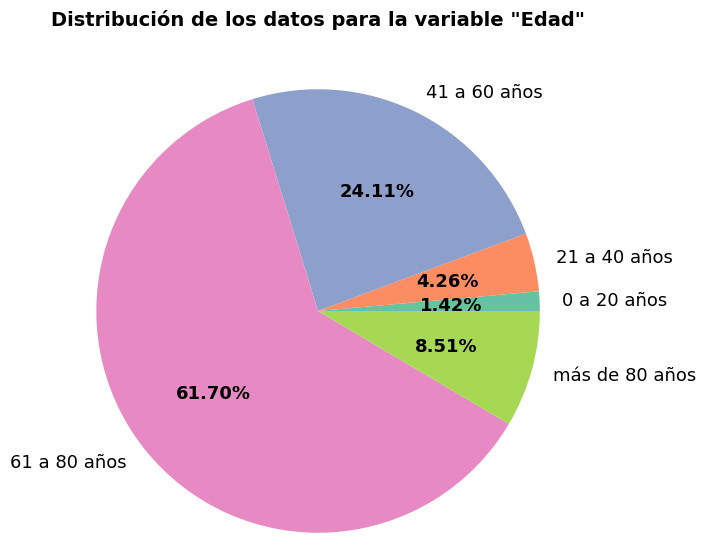

In [65]:
# Gráfica de pastel de la variable "Edad", para los casos de accidentes cerebrovasculares en mujeres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=age_total, labels=age_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Edad"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [66]:
glucose_grupo = pd.cut(x=acv_women['avg_glucose_level'],
                    bins=[57,79,100,125,float('inf')], 
                    labels=["57 a 79","80 a 101","102 a 125","más de 125"])
glucose_total = glucose_grupo.value_counts().sort_index()

glucose_indexes = glucose_total.index.values
glucose_valores = glucose_total.values

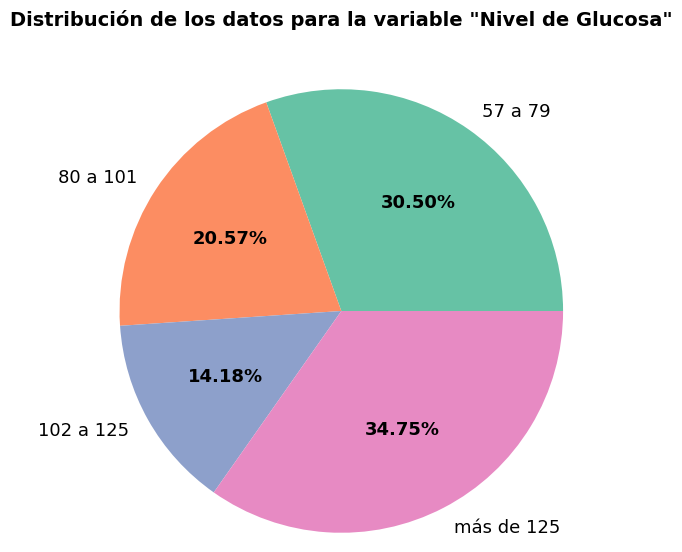

In [67]:
# Gráfica de pastel de la variable "avg_glucose_level", para los casos de accidentes cerebrovasculares en mujeres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=glucose_total, labels=glucose_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Nivel de Glucosa"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [68]:
bmi_grupo = pd.cut(x=acv_women['bmi'],
                    bins=[16,19,25,30,float('inf')], 
                    labels=["16 a 19","20 a 25","26 a 30","más de 30"])
bmi_total = bmi_grupo.value_counts().sort_index()

bmi_indexes = bmi_total.index.values
bmi_valores = bmi_total.values

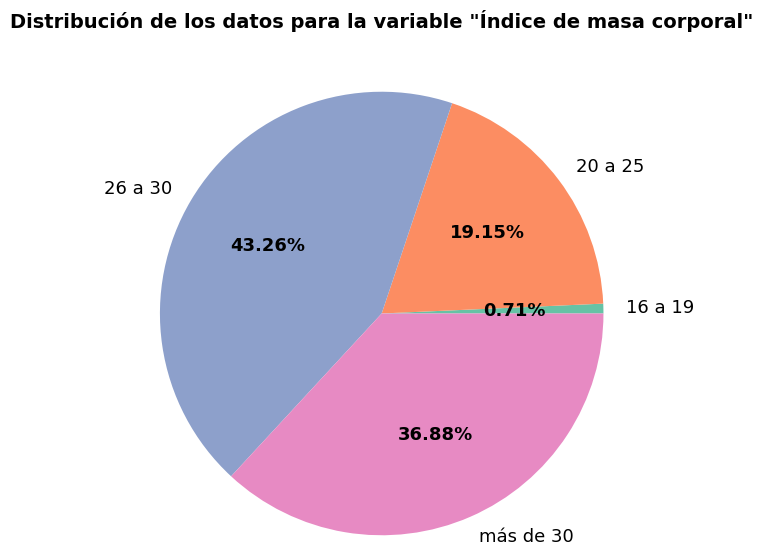

In [69]:
# Gráfica de pastel de la variable "bmi", para los casos de accidentes cerebrovasculares en mujeres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=bmi_total, labels=bmi_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Índice de masa corporal"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

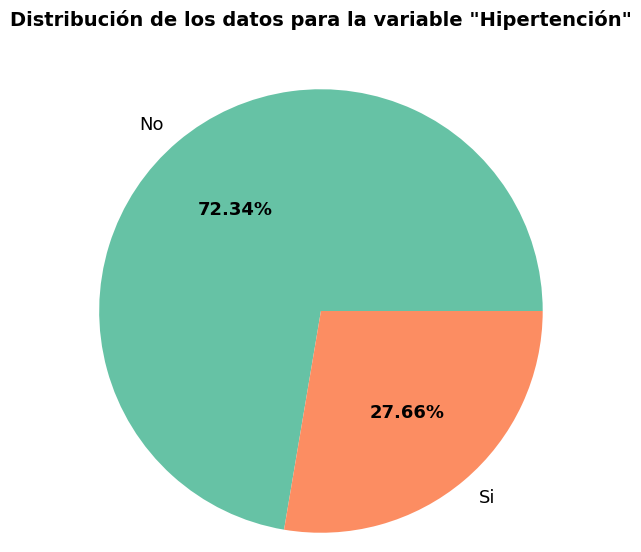

In [70]:
# Gráfica de pastel de la variable "hypertension", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
hypertension = acv_women['hypertension'].value_counts()
names = 'No', 'Si'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=hypertension, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Hipertención"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

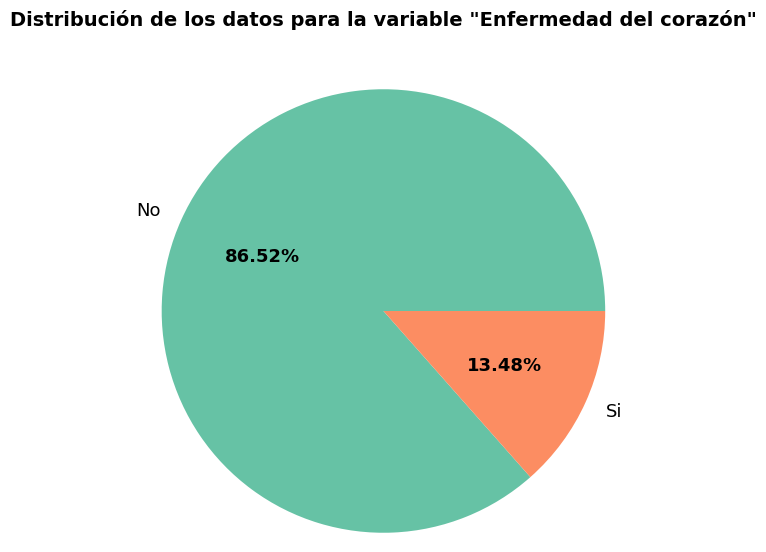

In [71]:
# Gráfica de pastel de la variable "heart_disease", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
heart_disease = acv_women['heart_disease'].value_counts()
names = 'No', 'Si'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=heart_disease, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Enfermedad del corazón"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

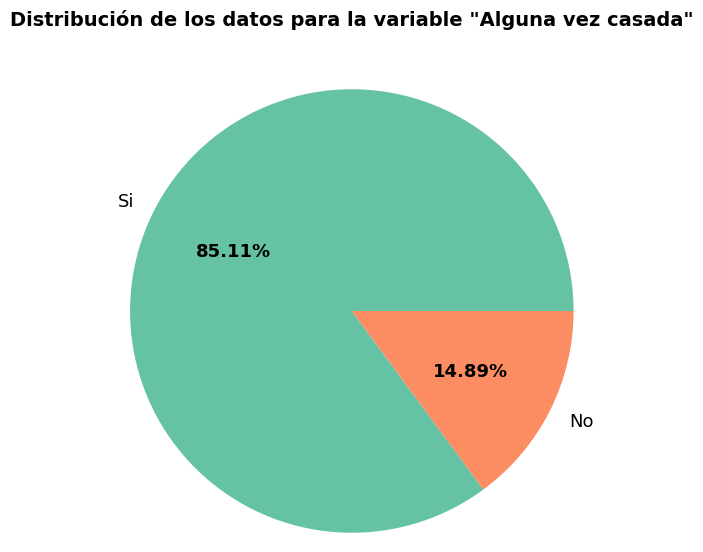

In [72]:
# Gráfica de pastel de la variable "ever_married", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
ever_married = acv_women['ever_married'].value_counts()
names = 'Si', 'No'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=ever_married, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Alguna vez casada"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

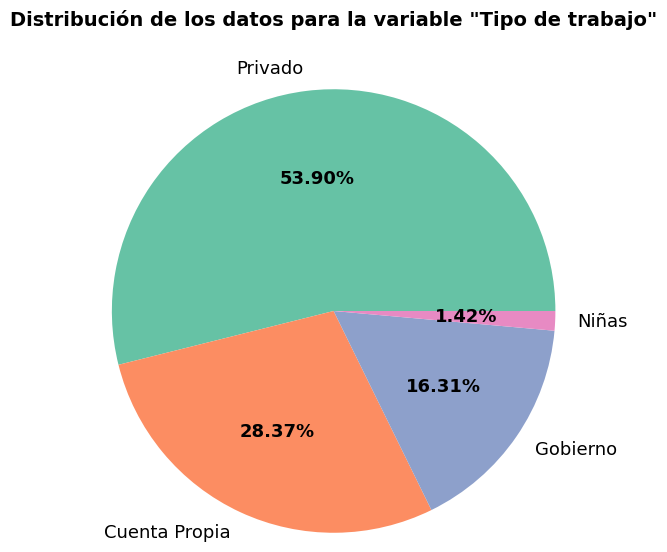

In [73]:
# Gráfica de pastel de la variable "work_type", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
work_type = acv_women['work_type'].value_counts()
names = 'Privado','Cuenta Propia','Gobierno','Niñas'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=work_type, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Tipo de trabajo"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

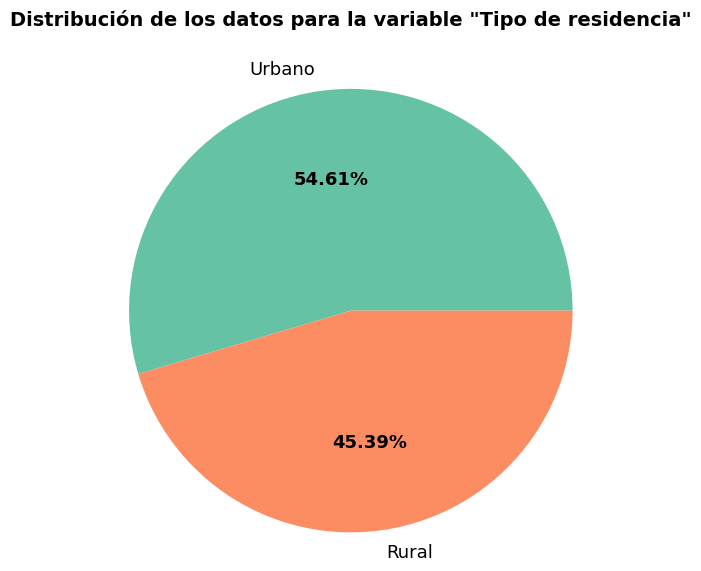

In [74]:
# Gráfica de pastel de la variable "residence_type", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
residence_type = acv_women['Residence_type'].value_counts()
names = 'Urbano','Rural'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=residence_type, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Tipo de residencia"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

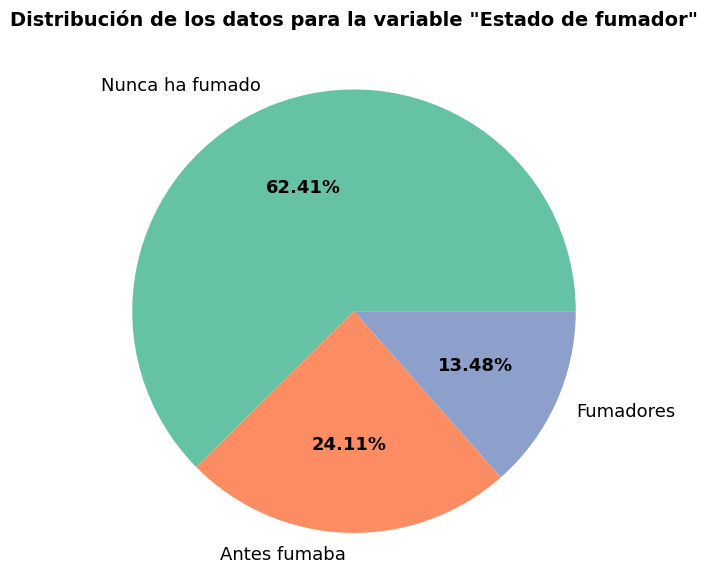

In [75]:
# Gráfica de pastel de la variable "smoking_status", para los casos de accidentes cerebrovasculares en mujeres.
# Seleccionamos la variable a gráficar
smoking_status = acv_women['smoking_status'].value_counts()
names = 'Nunca ha fumado','Antes fumaba','Fumadores'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=smoking_status, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Estado de fumador"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

## Casos de Accidentes Cerebro Vasculares para hombres

In [76]:
# Separamos en un dataset los casos de "accidentes cerebrovasculares" en hombres
avc_men = df_healthcare_unidos3[(df_healthcare_unidos3['gender']=='Male') & (df_healthcare_unidos3['stroke'] == 1)]
avc_men

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,1,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,1,32.5,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,1,29.0,formerly smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,1,27.4,never smoked
13,Male,78.0,0,1,Yes,Private,Urban,219.84,1,28.1,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
239,Male,66.0,0,0,Yes,Private,Rural,76.46,1,21.2,formerly smoked
240,Male,57.0,0,0,Yes,Private,Rural,197.28,1,34.5,formerly smoked
241,Male,68.0,0,0,Yes,Private,Rural,233.94,1,42.4,never smoked
243,Male,57.0,0,0,Yes,Private,Rural,84.96,1,36.7,never smoked


In [77]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
avc_men.describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
count,108.000000,108.000000,108.000000,108.000000,108.0,108.000000
mean,68.500000,0.250000,0.259259,143.159352,1.0,30.335185
std,10.456407,0.435031,0.440271,63.024682,0.0,5.101444
min,42.000000,0.000000,0.000000,56.110000,1.0,20.200000
25%,59.000000,0.000000,0.000000,86.860000,1.0,27.475000
50%,70.500000,0.000000,0.000000,115.435000,1.0,28.550000
75%,78.000000,0.250000,1.000000,208.387500,1.0,32.500000
max,82.000000,1.000000,1.000000,271.740000,1.0,45.900000


In [78]:
age_grupo = pd.cut(x=avc_men['age'],
                    bins=[40,60,80,float('inf')], 
                    labels=["40 a 60 años","61 a 80 años","más de 80 años"])
age_total = age_grupo.value_counts().sort_index()

age_indexes = age_total.index.values
age_valores = age_total.values

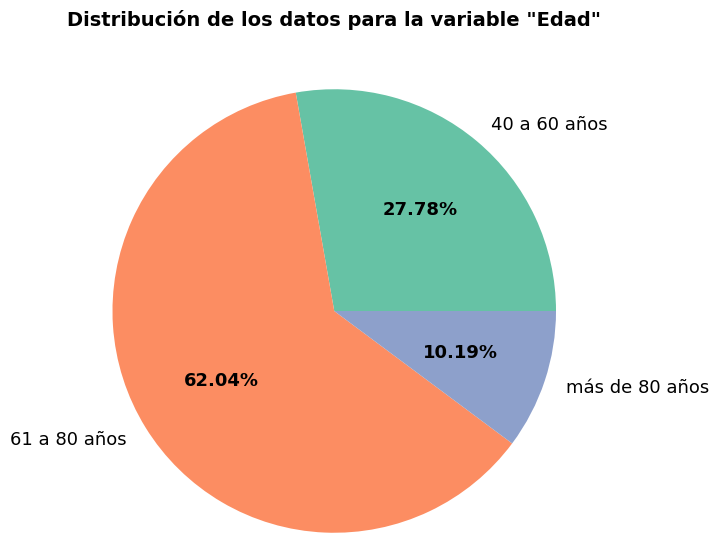

In [79]:
# Gráfica de pastel de la variable "Edad", para los casos de accidentes cerebrovasculares en hombres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=age_total, labels=age_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Edad"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [80]:
glucose_grupo = pd.cut(x=avc_men['avg_glucose_level'],
                    bins=[56,79,100,125,float('inf')], 
                    labels=["56 a 79","80 a 101","102 a 125","más de 125"])
glucose_total = glucose_grupo.value_counts().sort_index()

glucose_indexes = glucose_total.index.values
glucose_valores = glucose_total.values

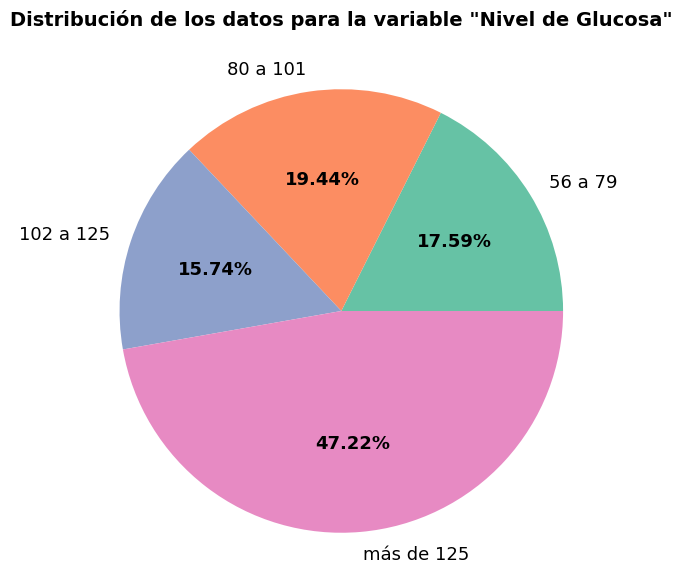

In [81]:
# Gráfica de pastel de la variable "avg_glucose_level", para los casos de accidentes cerebrovasculares en hombres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=glucose_total, labels=glucose_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Nivel de Glucosa"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

In [82]:
bmi_grupo = pd.cut(x=avc_men['bmi'],
                    bins=[19,25,30,float('inf')], 
                    labels=["20 a 25","26 a 30","más de 30"])
bmi_total = bmi_grupo.value_counts().sort_index()

bmi_indexes = bmi_total.index.values
bmi_valores = bmi_total.values

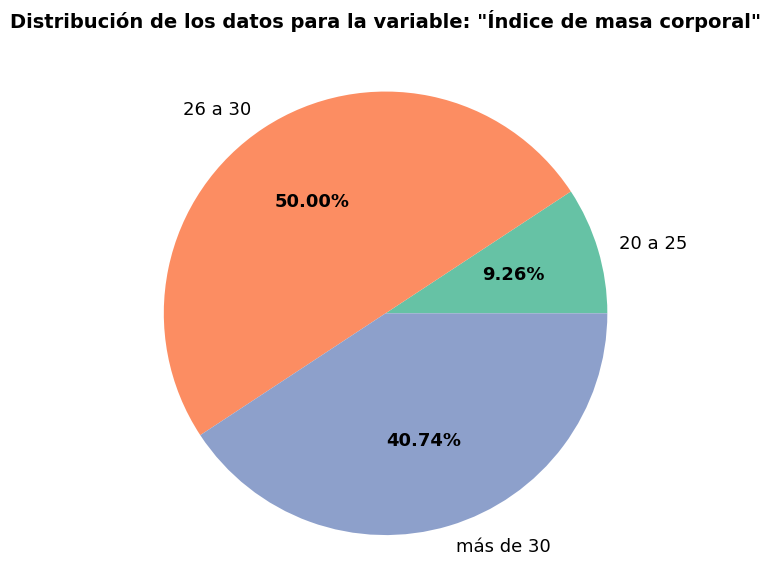

In [83]:
# Gráfica de pastel de la variable "bmi", para los casos de accidentes cerebrovasculares en mujeres.
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=bmi_total, labels=bmi_indexes, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable: "Índice de masa corporal"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

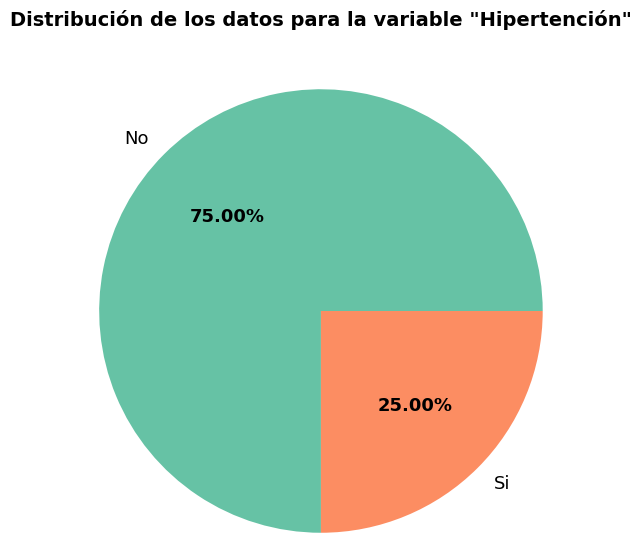

In [84]:
# Gráfica de pastel de la variable "hypertension", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
hypertension = avc_men['hypertension'].value_counts()
names = 'No', 'Si'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=hypertension, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Hipertención"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

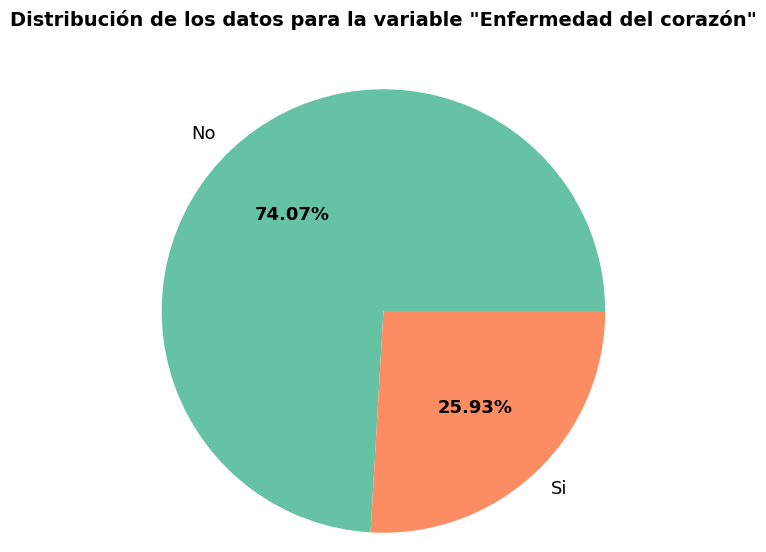

In [85]:
# Gráfica de pastel de la variable "heart_disease", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
heart_disease = avc_men['heart_disease'].value_counts()
names = 'No', 'Si'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=heart_disease, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Enfermedad del corazón"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

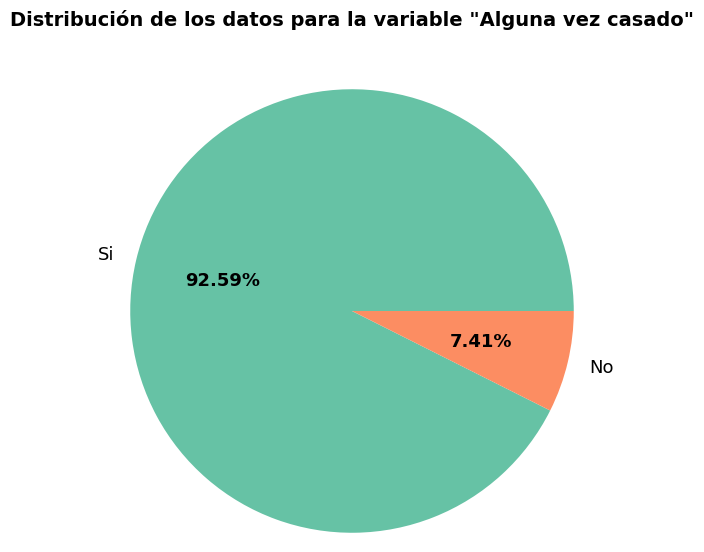

In [86]:
# Gráfica de pastel de la variable "ever_married", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
ever_married = avc_men['ever_married'].value_counts()
names = 'Si','No'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=ever_married, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Alguna vez casado"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

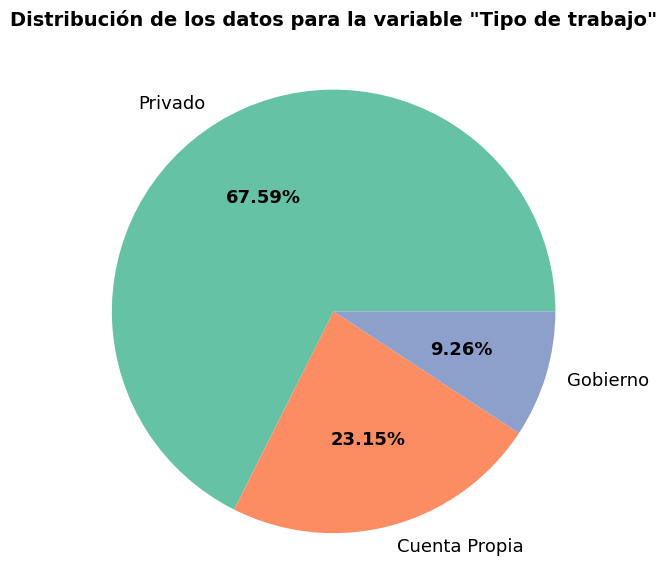

In [87]:
# Gráfica de pastel de la variable "work_type", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
work_type = avc_men['work_type'].value_counts()
names = 'Privado','Cuenta Propia','Gobierno'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=work_type, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Tipo de trabajo"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

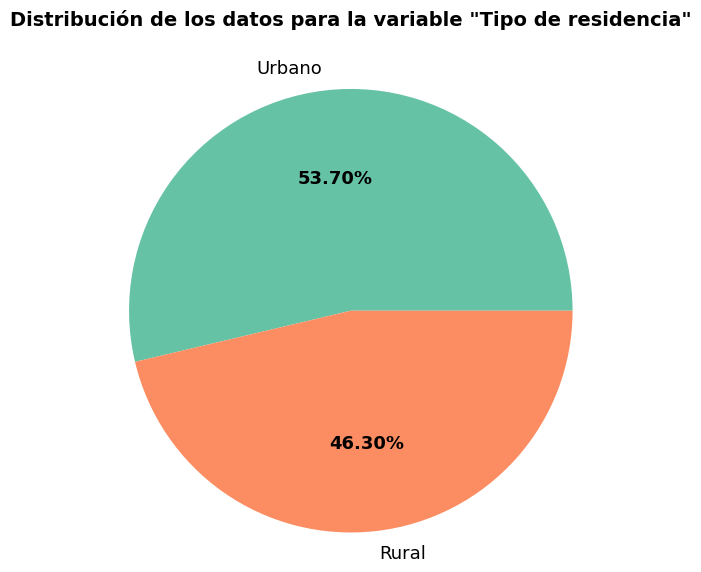

In [88]:
# Gráfica de pastel de la variable "residence_type", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
residence_type = avc_men['Residence_type'].value_counts()
names = 'Urbano','Rural'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=residence_type, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Tipo de residencia"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

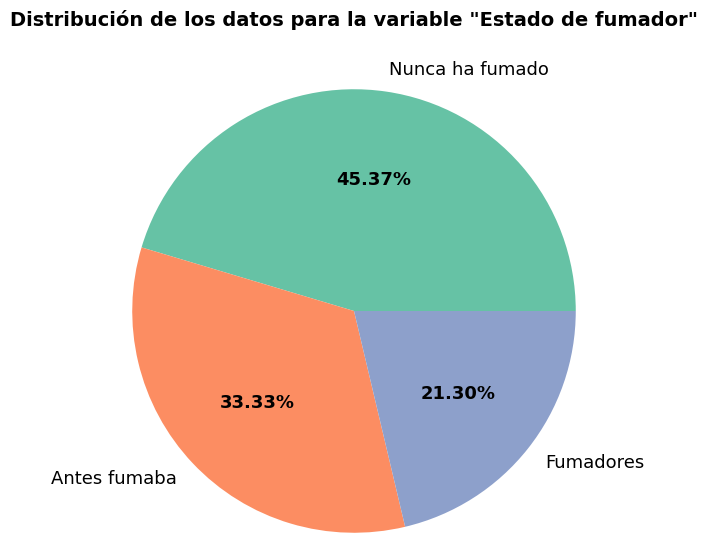

In [89]:
# Gráfica de pastel de la variable "smoking_status", para los casos de accidentes cerebrovasculares en hombres.
# Seleccionamos la variable a gráficar
smoking_status = avc_men['smoking_status'].value_counts()
names = 'Nunca ha fumado','Antes fumaba','Fumadores'

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=smoking_status, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos para la variable "Estado de fumador"', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

## Balanceamos los datos

In [90]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df_healthcare = df_healthcare_unidos3.drop("stroke", axis=1)
y_df_healthcare = df_healthcare_unidos3["stroke"].copy()

In [91]:
# Validamos la cantidad de casos de personas que han tenido un accidentes cerebrovascular y los casos de personas que no han tenido un accidentes cerebrovascular.
# Con esto podemos verificar si nuestro dataset esta desbalanceado y necesita que apliquemos alguna técnica de balanceo de datos. 
no = y_df_healthcare.sum()
si = y_df_healthcare.shape[0]- no
print('Personas que no tuvieron un ACV:',si,'Personas que si tuvieron un ACV:', no)

Personas que no tuvieron un ACV: 4855 Personas que si tuvieron un ACV: 249


Necesitamos usar SMOTEN debido a un posible desequilibrio en la distribución de clases, lo que puede afectar el rendimiento del modelo predictivo.
SMOTE ayuda a abordar este problema generando datos sintéticos para la clase minoritaria y equilibrando la distribución de clases.

In [92]:
# https://imbalanced-learn.org/dev/over_sampling.html
# Inicializamos el método de sobremuestreo
sampler = SMOTEN(random_state=0)
# Le pasamos el dataset
X_smoten, y_smoten = sampler.fit_resample(X_df_healthcare, y_df_healthcare)
# Hacemos un nuevo recuento para validar la cantidad de datos por cada caso
no_smoten = y_smoten.sum()
si_smoten = y_smoten.shape[0]- no_smoten
print('Personas que no tuvieron un ACV:', si_smoten ,'Personas que si tuvieron un ACV:', no_smoten)
# Visualizamos el dataset equilibrado para ambos casos 
X_smoten

Personas que no tuvieron un ACV: 4855 Personas que si tuvieron un ACV: 4855


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
9705,Male,60.0,0,1,Yes,Private,Urban,74.10,26.1,never smoked
9706,Female,79.0,0,0,Yes,Private,Rural,70.30,20.3,never smoked
9707,Female,58.0,0,0,Yes,Private,Rural,59.86,28.0,formerly smoked
9708,Male,57.0,0,1,Yes,Private,Urban,109.78,28.1,never smoked


Una alternativa a SMOTEN podria ser algo como esto:

In [93]:
from sklearn.preprocessing import StandardScaler
X_df_healthcare['gender'] = X_df_healthcare['gender'].replace({'Male': 1, 'Female': 0})
X_df_healthcare['ever_married'] = X_df_healthcare['ever_married'].replace({'Yes': 1, 'No': 0})
X_df_healthcare['work_type'] = X_df_healthcare['work_type'].replace({'Private': 0, 'Self-employed': 1,'Govt_job':2,'children':3})
X_df_healthcare['Residence_type'] = X_df_healthcare['Residence_type'].replace({'Urban': 1, 'Rural': 0})
X_df_healthcare['smoking_status'] = X_df_healthcare['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1,'smokes':2})


# Estandarizamos las características del dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df_healthcare)

# Recuento de la cantidad de datos por cada caso
no_stroke = y_df_healthcare.sum()
stroke = y_df_healthcare.shape[0] - no_stroke
print('Personas que no tuvieron un ACV:', stroke ,'Personas que si tuvieron un ACV:', no_stroke)

# Visualizamos el dataset estandarizado
X_scaled


Personas que no tuvieron un ACV: 4855 Personas que si tuvieron un ACV: 249


array([[ 1.18927723,  1.05027185, -0.32881582, ...,  2.70513394,
         1.00396308, -1.71505225],
       [-0.84084684,  0.78490061, -0.32881582, ...,  2.120567  ,
        -0.10000164,  0.03252744],
       [ 1.18927723,  1.62524288, -0.32881582, ..., -0.00511091,
         0.47146245,  0.03252744],
       ...,
       [ 1.18927723, -1.86527352, -0.32881582, ..., -0.59607983,
        -1.4896984 ,  0.03252744],
       [ 1.18927723, -1.51498348, -0.32881582, ..., -0.75657083,
        -1.47671058,  0.03252744],
       [-0.84084684, -1.33806932, -0.32881582, ..., -0.06780616,
        -1.33384455,  0.03252744]])

Como podemos observar esto no iguala el numero de pacientes que tuvieron y no tuvieron un Accidnete Cerebrovascular

## Escalamos los datos

In [94]:
# Separamos las columnas numéricas para escalarlas
columnas_para_escalar = X_smoten[["age", "avg_glucose_level", "bmi"]]
columnas_para_escalar

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
9705,60.0,74.10,26.1
9706,79.0,70.30,20.3
9707,58.0,59.86,28.0
9708,57.0,109.78,28.1


In [95]:
#Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(columnas_para_escalar)

In [96]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=columnas_para_escalar.columns, index=columnas_para_escalar.index)
#Visualización de los cambios
X_scaled

,age,avg_glucose_level,bmi
0,0.643354,3.573636,1.455744
1,0.368773,2.884361,0.105150
2,1.238279,0.377929,0.804281
3,-0.180389,2.077951,1.106178
4,1.192515,2.153177,-0.546314
...,...,...,...
9705,0.323009,-0.450346,-0.212637
9706,1.192515,-0.549261,-1.134220
9707,0.231482,-0.821014,0.089260
9708,0.185719,0.478405,0.105150


In [97]:
# Pasar las características transformadas al dataset original
df_healthcare_elimnados8 = X_smoten.drop(['age',"avg_glucose_level","bmi"], axis=1)
df_healthcare_elimnados8

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Female,0,0,Yes,Self-employed,Rural,never smoked
2,Male,0,1,Yes,Private,Rural,never smoked
3,Female,0,0,Yes,Private,Urban,smokes
4,Female,1,0,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...
9705,Male,0,1,Yes,Private,Urban,never smoked
9706,Female,0,0,Yes,Private,Rural,never smoked
9707,Female,0,0,Yes,Private,Rural,formerly smoked
9708,Male,0,1,Yes,Private,Urban,never smoked


In [98]:
df_healthcare_unidos4 = pd.concat([df_healthcare_elimnados8, X_scaled], axis=1,sort=True)
df_healthcare_unidos4 

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi
0,Male,0,1,Yes,Private,Urban,formerly smoked,0.643354,3.573636,1.455744
1,Female,0,0,Yes,Self-employed,Rural,never smoked,0.368773,2.884361,0.105150
2,Male,0,1,Yes,Private,Rural,never smoked,1.238279,0.377929,0.804281
3,Female,0,0,Yes,Private,Urban,smokes,-0.180389,2.077951,1.106178
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1.192515,2.153177,-0.546314
...,...,...,...,...,...,...,...,...,...,...
9705,Male,0,1,Yes,Private,Urban,never smoked,0.323009,-0.450346,-0.212637
9706,Female,0,0,Yes,Private,Rural,never smoked,1.192515,-0.549261,-1.134220
9707,Female,0,0,Yes,Private,Rural,formerly smoked,0.231482,-0.821014,0.089260
9708,Male,0,1,Yes,Private,Urban,never smoked,0.185719,0.478405,0.105150


In [99]:
df_healthcare_unidos5= pd.concat([df_healthcare_unidos4,y_smoten], axis=1,sort=True)
df_healthcare_unidos5

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,0.643354,3.573636,1.455744,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,0.368773,2.884361,0.105150,1
2,Male,0,1,Yes,Private,Rural,never smoked,1.238279,0.377929,0.804281,1
3,Female,0,0,Yes,Private,Urban,smokes,-0.180389,2.077951,1.106178,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1.192515,2.153177,-0.546314,1
...,...,...,...,...,...,...,...,...,...,...,...
9705,Male,0,1,Yes,Private,Urban,never smoked,0.323009,-0.450346,-0.212637,1
9706,Female,0,0,Yes,Private,Rural,never smoked,1.192515,-0.549261,-1.134220,1
9707,Female,0,0,Yes,Private,Rural,formerly smoked,0.231482,-0.821014,0.089260,1
9708,Male,0,1,Yes,Private,Urban,never smoked,0.185719,0.478405,0.105150,1


## Tranformamos las variables categóricas

In [100]:
# Transformación de las columnas categóricas nominales a numéricas
# Seleccionamos las columnas que deben ser transformadas
df_healthcare_tranformado = pd.get_dummies(df_healthcare_unidos5, columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first = True)
# Visualizamos los cambios aplicados
df_healthcare_tranformado

,hypertension,heart_disease,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,0,1,0.643354,3.573636,1.455744,1,1,1,1,0,0,1,0,0
1,0,0,0.368773,2.884361,0.105150,1,0,1,0,1,0,0,1,0
2,0,1,1.238279,0.377929,0.804281,1,1,1,1,0,0,0,1,0
3,0,0,-0.180389,2.077951,1.106178,1,0,1,1,0,0,1,0,1
4,1,0,1.192515,2.153177,-0.546314,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,0,1,0.323009,-0.450346,-0.212637,1,1,1,1,0,0,1,1,0
9706,0,0,1.192515,-0.549261,-1.134220,1,0,1,1,0,0,0,1,0
9707,0,0,0.231482,-0.821014,0.089260,1,0,1,1,0,0,0,0,0
9708,0,1,0.185719,0.478405,0.105150,1,1,1,1,0,0,1,1,0


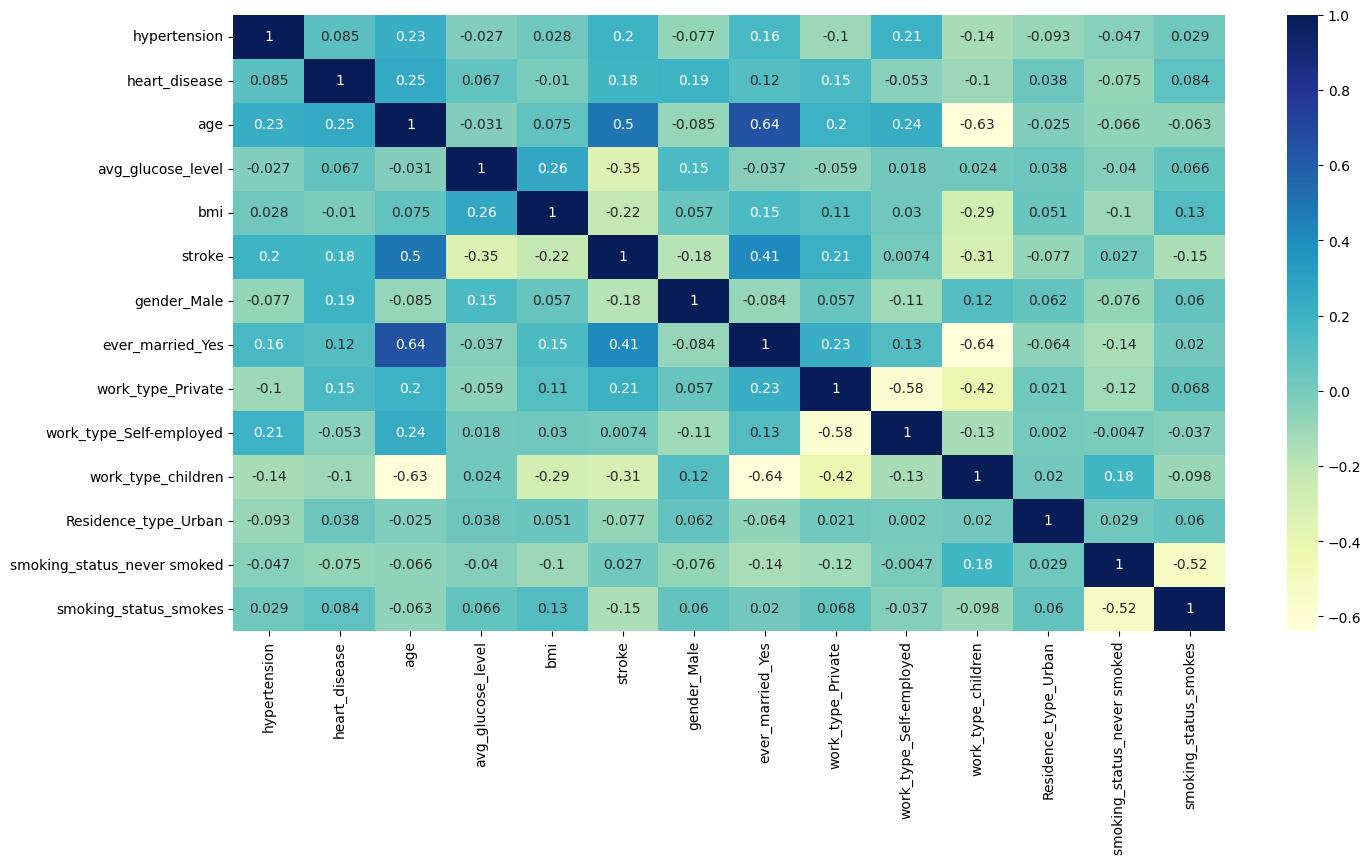

In [101]:
# Validamos correlaciones
correlation = df_healthcare_tranformado.corr()
fig = plt.figure (figsize = (16,8))
ax = fig.add_subplot(111)
df_healthcare_tranformado.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

## Dividimos el conjunto de datos

In [102]:
# Construcción de una función que realice el particionado completo
#Esta funcion  realiza una división en tres conjuntos diferentes: entrenamiento (train_set) y prueba (test_set).

#Usamos  la función "train_test_split" de la biblioteca Scikit-Learn, que separa aleatoriamente el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba,
# en una proporción 90/10 (test_size=0.1).

#El argumento "shuffle" indica si los datos deben ser mezclados antes de la división y
# "stratify" se utiliza para asegurarse de que los conjuntos de entrenamiento y prueba tengan la misma proporción de valores en una determinada columna
# (por ejemplo, para mantener la proporción de clases en un problema de clasificación).

#Finalmente, la función devuelve una tupla que contiene los conjuntos de entrenamiento y prueba.

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.9, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
   
    return (train_set, test_set)

In [103]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, test_set = train_val_test_split(df_healthcare_tranformado, stratify='stroke')

In [104]:
#Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 971
Longitud del Test Set: 8739


In [105]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("stroke", axis=1)
y_train = train_set["stroke"].copy()

In [106]:
# Conjunto de datos de test
X_test = test_set.drop("stroke", axis=1)
y_test = test_set["stroke"].copy()

## Seleccionamos los mejores modelos

In [107]:
# Pruebas de con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Evaluación de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 83.21% (3.08%)
SVM: 87.85% (3.24%)
KNeighbors: 84.15% (2.95%)
GaussianNB: 69.72% (3.27%)
BernoulliNB: 78.58% (3.02%)
Decision Tree: 91.45% (1.90%)
Random Forest: 95.06% (2.14%)
Ada Boost: 89.71% (4.43%)


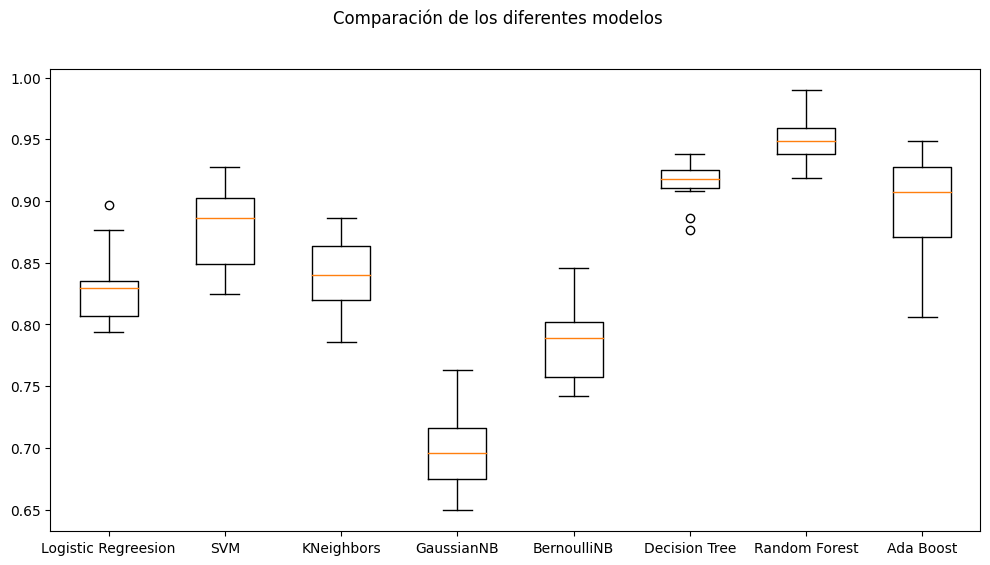

In [108]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig = plt.figure(figsize =(12,6))
fig.suptitle('Comparación de los diferentes modelos ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Buscamos los mejores parametros para los diferentes modelos

In [109]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters_KN = {"n_neighbors" : [1,3,5],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_KNN, param_grid=parameters_KN, cv=kFold, return_train_score=True)
model_KN_optimo= grid.fit(X_train, y_train)

# mejores parámetros
model_KN_optimo.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [110]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters_DTC = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters_DTC, cv=kFold, return_train_score=True)
model_DTC_optimo= grid2.fit(X_train, y_train)

# mejores parámetros
model_DTC_optimo.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'splitter': 'best'}

In [111]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters_RFC = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters_RFC, cv=kFold, return_train_score=True)
model_RFC_optimo= grid3.fit(X_train, y_train)

# mejores parámetros
model_RFC_optimo.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt'}

In [112]:
# Comparación de modelos con los resultados de la búsqueda de los mejores parámetros 
models_hiper = []
models_hiper.append(['KNeighbors', KNeighborsClassifier(**model_KN_optimo.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**model_DTC_optimo.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**model_RFC_optimo.best_params_)])

# Evaluación de los diferentes modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

KNeighbors: 89.71% (3.66%)
Decision Tree: 91.35% (2.36%)
Random Forest: 94.96% (1.97%)


In [113]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
modelo_optimo = RandomForestClassifier(**model_RFC_optimo.best_params_)
# Le pasamos los datos de entrenamiento 
modelo_optimo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de test
y_pred = modelo_optimo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test 
accuracy_score(y_test, y_pred)

0.9496509898157683

## Reducimos las caracterìsticas

In [114]:
# Selección de las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), modelo_optimo.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(3)

avg_glucose_level    0.273500
age                  0.241775
bmi                  0.224600
dtype: float64

In [115]:
# Extraemos las 3 características con mas relevancia para el algoritmo
columnas_relevantes = list(feature_importances_sorted.head(3).index)
columnas_relevantes

['avg_glucose_level', 'age', 'bmi']

In [116]:
# Aplicamos la reducción de características al dataset de entrenamiento y pruebas
X_train_reduced = X_train[columnas_relevantes].copy()
X_test_reduced = X_test[columnas_relevantes].copy()
X_train_reduced.head(3)

,avg_glucose_level,age,bmi
2335,-0.151001,0.323009,1.122068
150,2.037344,1.192515,0.105150
2184,0.218105,1.100988,1.678195


## Modelo Final

In [117]:
# Probamos el modelo nuevamente con el dataset reducido 
# Inicializamos el modelo 
modelo_optimo2 = RandomForestClassifier(**model_RFC_optimo.best_params_)
# Le pasamos los datos de entrenamiento 
modelo_optimo2.fit(X_train_reduced,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred3 = modelo_optimo2.predict(X_test_reduced)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_test, y_pred3)

0.9295113857420757

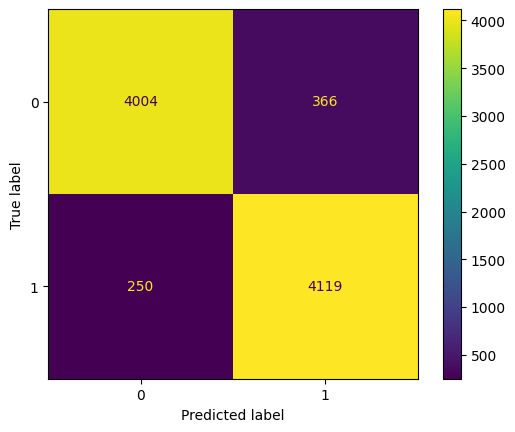

In [118]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(modelo_optimo2, X_test_reduced, y_test, values_format='3g')

In [119]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4370
           1       0.92      0.94      0.93      4369

    accuracy                           0.93      8739
   macro avg       0.93      0.93      0.93      8739
weighted avg       0.93      0.93      0.93      8739



In [120]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
print("ROC AUC SCORE \n",roc_auc_score(y_test, y_pred3))

ROC AUC SCORE 
 0.9295129037377444


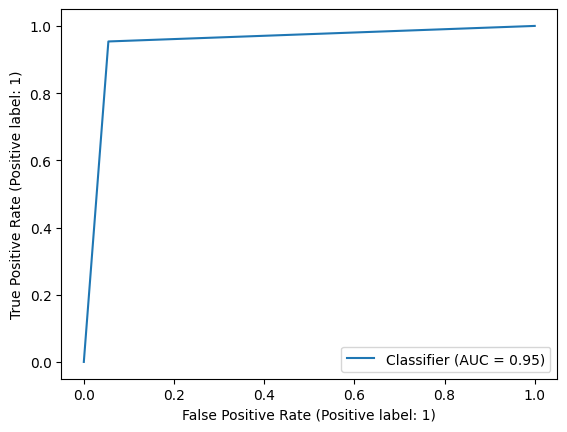

In [121]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

In [122]:


print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred3)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred3))

Mean Absolute Error: 0.07048861425792424
Mean Absolute Percentage Error: 1.8861625627847596e+16
Mean Squared Error: 0.07048861425792424
Root Mean Squared Error: 0.26549691948857757
R^2 coefficient of determination: 0.7180455392763557
